In [12]:
"""
chapter 12
"""

# import libs 
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

from neuralnet import NeuralNetMLP

from sklearn.neural_network import MLPClassifier

In [2]:
# --------------------- helper method -----------------

def load_mnist(path, kind='train'):
    """
    Load MNIST data from `path`
    :return images: n(number of samples)xm(number of features) dimensional NumPy array (images)
    :return labels: class labels, integers 0-9
    """
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)

    return images, labels    

In [3]:
# load the 60,000 training instances 
# the 10,000 test samples from the mnist directory

# load_mnist('.\mnist', kind='train')
X_train, y_train = load_mnist('mnist', kind='train')
print('Training set:')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

# load_mnist('.\mnist', kind='t10k')
X_test, y_test = load_mnist('mnist', kind='t10k')
print('Test set:')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Training set:
Rows: 60000, columns: 784
Test set:
Rows: 10000, columns: 784


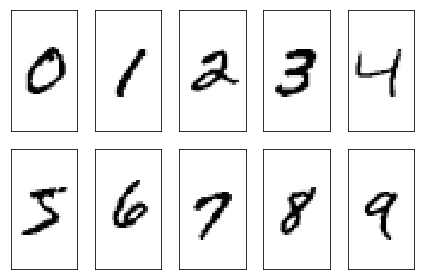

In [4]:
# visualize examples of the digits 0-9 
# reshape the 784-pixel vectors from the feature matrix into the original 28×28 image 
# can plot via matplotlib's imshow function
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

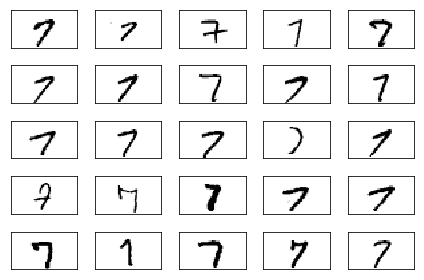

In [16]:
# plot multiple examples of the same digit 
# how different handwriting examples are
fig, ax = plt.subplots(nrows=5, 
                       ncols=5, 
                       sharex=True, 
                       sharey=True,)

ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)  # number 7 
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# CSV format 
# CSV file format will take up substantially more space

# save data as CSV file 
'''
np.savetxt('train_img.csv', X_train, fmt='%i', delimiter=',')
np.savetxt('train_labels.csv', y_train, fmt='%i', delimiter=',')
np.savetxt('test_img.csv', X_test, fmt='%i', delimiter=',')
np.savetxt('test_labels.csv', y_test, fmt='%i', delimiter=',')
'''

# load CSV file 
'''
X_train = np.genfromtxt('train_img.csv', dtype=int, delimiter=',')
y_train = np.genfromtxt('train_labels.csv', dtype=int, delimiter=',')
X_test = np.genfromtxt('test_img.csv', dtype=int, delimiter=',')
y_test = np.genfromtxt('test_labels.csv', dtype=int, delimiter=',')
'''

In [5]:
# initialize a new MLP 
# 785-50-10 --> 
# 784 input units (n_features) 
# 50 hidden units (n_hidden) 
# 10 output units (n_output)

nn = NeuralNetMLP(n_output=10, # 10 output units 
                  n_features=X_train.shape[1],  # 784 input units 
                  n_hidden=50, # 50 hidden units 
                  # L2 regularization to decrease the degree of overfitting
                  l2=0.1, 
                  # for L1 regularization
                  l1=0.0, 
                  # number of passes over the training set
                  epochs=1000, 
                  # learning rate 
                  eta=0.001, 
                  # alpha: parameter for momentum learning to add a factor of the previous 
                  # gradient to the weight update for faster learning
                  alpha=0.001, 
                  # decrease_const: adaptive learning rate n 
                  # that decreases over time for better convergence (eta/1+t*d) 
                  decrease_const=0.00001, 
                  # shuffling the training set prior to every epoch to prevent the 
                  # algorithm from getting stuck in cycles
                  shuffle=True,
                  # Splitting of the training data into k mini-batches in each epoch
                  minibatches=50, 
                  random_state=1)

In [6]:
# train the MLP using 60,000 samples 
nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

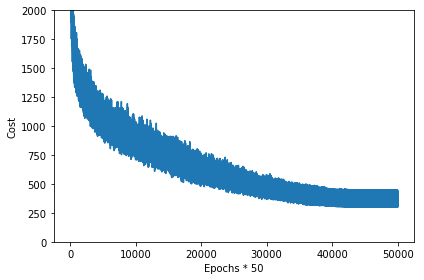

In [7]:
# plot every 50th step to account for  
# the 50 mini-batches (50 mini-batches × 1000 epochs).
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
plt.show()

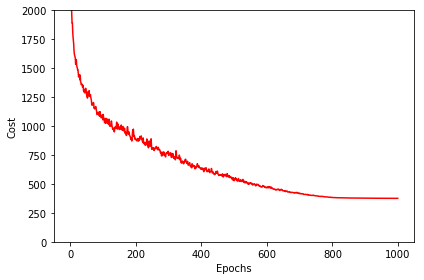

In [8]:
# a smoother version of the cost function 
# against the number of epochs by averaging over the mini-batch intervals
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

plt.plot(range(len(cost_avgs)),
         cost_avgs, 
         color='red')

plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

# indicating that the training algorithm 
# converged shortly after the 800th epoch

In [9]:
# evaluate the performance of the model by calculating the  
# prediction accuracy
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 97.60%


In [10]:
# calculate the accuracy on 10,000 
# images in the test dataset
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

# Based on the small discrepancy between training and test accuracy, we can conclude 
# that the model only slightly overfits the training data. 

Training accuracy: 95.89%


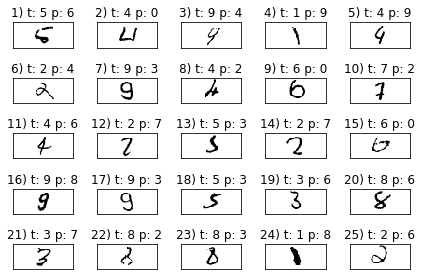

In [11]:
# incorrectly classified images 
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, 
                       ncols=5, 
                       sharex=True, 
                       sharey=True)

ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [14]:
# Multi-layer Perceptron with sklearn: MLPClassifier 
# not intended for large-scale applications

X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# train using Backpropagation
clf.fit(X, y)   

# the weight matrices that constitute the model parameters:
print('the weight matrices: ')
print([coef.shape for coef in clf.coefs_])


# prediction results
print('prediction results:')
r = clf.predict([[2., 2.], [-1., -2.]])
print(r)

# minimizes the Cross-Entropy loss function
# giving a vector of probability estimates P(y|x) per sample x:
print('prediction probability:')
clf.predict_proba([[2., 2.], [1., 2.]])

the weight matrices: 
[(2, 5), (5, 2), (2, 1)]
prediction results:
[1 0]
prediction probability:


array([[  1.96718015e-04,   9.99803282e-01],
       [  1.96718015e-04,   9.99803282e-01]])